In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
import scienceplots
%matplotlib inline

import sys
sys.path.append("/home/jonas/phd/NanoNets/src/")
sys.path.append("/mnt/c/Users/jonas/Desktop/phd/NanoNets/src/")

from scipy.interpolate import interp1d

import nanonets_utils
import nanonets

In [166]:
def plot_freq(f, ax, min_y, max_y, N_f=5):

    ax.vlines(f, min_y, max_y, colors='black', linestyles='solid', label=f"$f_0 = {f}$ GHz")

    for n in range(2,N_f+1):
        ax.vlines(n*f, min_y, max_y, colors='#A60628', linestyles='dotted')
    
    return ax

In [167]:
def plot_freq_double(f1, f2, ax, min_y, max_y):

    ax.vlines(f1, min_y, max_y, colors='black', linestyles='solid', label=f"$f_1 = {f1}$ GHz")
    ax.vlines(f2, min_y, max_y, colors='black', linestyles='solid', label=f"$f_2 = {f1}$ GHz")

    ax.vlines(f1+f2, min_y, max_y, colors='#A60628', linestyles='dotted')
    ax.vlines(2*f1+f2, min_y, max_y, colors='#A60628', linestyles='dotted')
    ax.vlines(3*f1+f2, min_y, max_y, colors='#A60628', linestyles='dotted')
    ax.vlines(f1+2*f2, min_y, max_y, colors='#A60628', linestyles='dotted')
    ax.vlines(f1+3*f2, min_y, max_y, colors='#A60628', linestyles='dotted')
    ax.vlines(np.abs(f1-f2), min_y, max_y, colors='#A60628', linestyles='dotted')
    
    return ax

In [168]:
def relate_to_fundamental_freq(signal, f, dt, N_f=10):

    xf, yf  = nanonets_utils.fft(signal, dt, n_padded=65536)
    func    = interp1d(xf, yf)

    vals    = []
    for n in range(1,N_f+1):
        vals.append(func(n*f/10))
    
    return np.array(vals)

In [169]:
frequencies = [[1.5,4.5],[1.5,1.55],[4.5,4.55],[1.5,3.0]]
dic         = {(f[0],f[1]) : pd.read_csv(f"uniform/data/Nx=7_Ny=7_Nz=1_Ne=3_{f[0]}_{f[1]}.csv") for f in frequencies}

In [170]:
dic.keys()

dict_keys([(1.5, 4.5), (1.5, 1.55), (4.5, 4.55), (1.5, 3.0)])

### Frequency Doubling

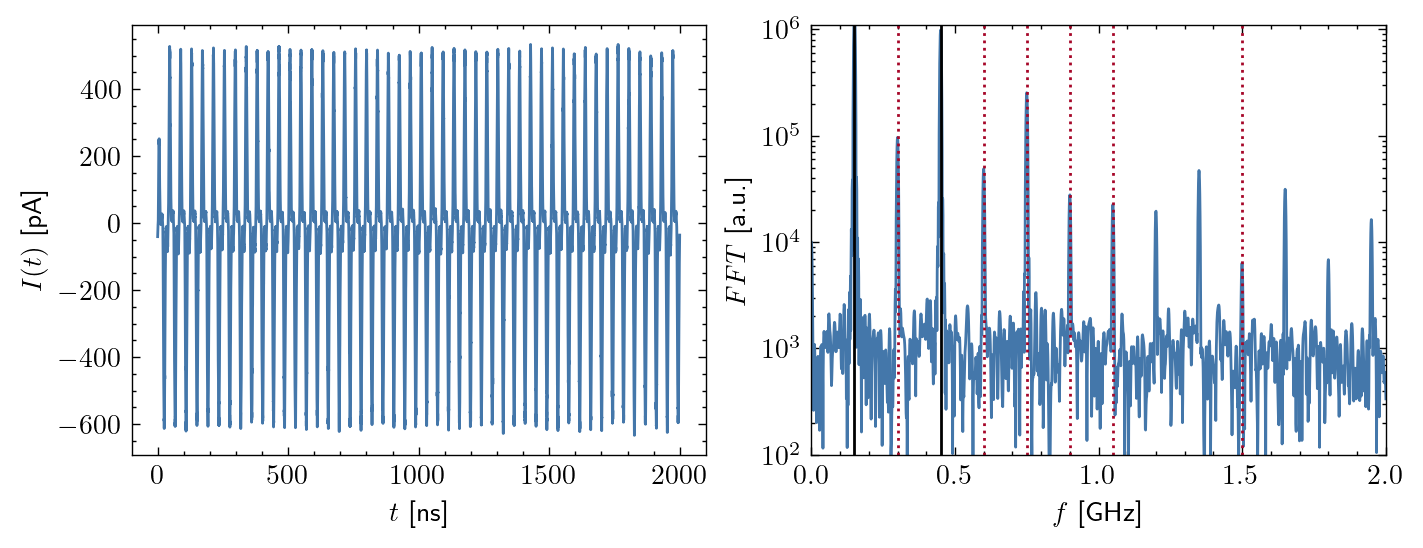

In [171]:
freq    = 1
signal  = dic[(1.5,4.5)]['Current'].values
dt      = 1e-10
xf, yf  = nanonets_utils.fft(signal-np.mean(signal), dt, n_padded=65536)
time    = np.arange(len(signal))*dt*1e9
min_y   = 100
min_x   = 0
max_x   = 2
max_y   = 1.1e6

with plt.style.context(["science", "bright"]):

    fig = plt.figure(dpi=200, layout='constrained')
    fig.set_figwidth(fig.get_figwidth()*2)

    ax = fig.add_subplot(1,2,1)
    ax.plot(time, signal)
    ax.set_ylabel("$I(t)$ [pA]")
    ax.set_xlabel("$t$ [ns]")
    # ax.set_ylim(-100,100)
    # ax.set_xlim(0,50)

    ax  = fig.add_subplot(1,2,2)
    ax.plot(xf,yf)
    ax = plot_freq_double(1.5/10, 4.5/10, ax=ax, min_y=min_y, max_y=max_y)
    ax.set_xlim(min_x, max_x)
    ax.set_ylim(min_y, max_y)
    ax.set_yscale('log')
    ax.set_xlabel("$f$ [GHz]")
    ax.set_ylabel("$FFT$ [a.u.]")

    fig.savefig("plots/fft_output_freq_double.png", transparent=True, bbox_inches='tight')
    fig.savefig("plots/fft_output_freq_double.svg", transparent=True, bbox_inches='tight')

In [173]:
f1      = 1.5
f2      = 4.5
f_vals1 = [f1, f2, 2*f1, 3*f1, 4*f2, 2*f2, 3*f2, 4*f2, f1+f2, 2*f1+f2, f1+2*f2, np.abs(f1-f2), np.abs(2*f1-f2), np.abs(f1-2*f2)]
vals1   = []

for f in f_vals1:

    vals1.append(relate_to_fundamental_freq(signal, f, dt, N_f=1)[0])

### Beat freaquency and envelope modulation

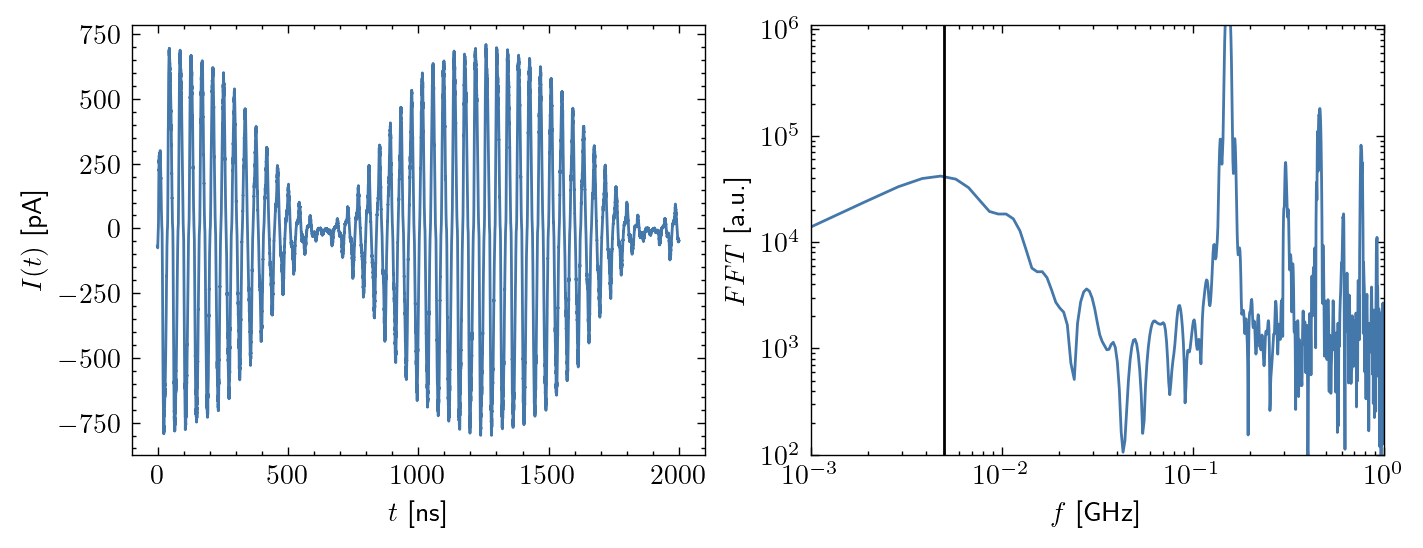

In [181]:
freq    = 1
signal  = dic[(1.5,1.55)]['Current'].values
dt      = 1e-10
xf, yf  = nanonets_utils.fft(signal-np.mean(signal), dt, n_padded=65536)
time    = np.arange(len(signal))*dt*1e9
min_y   = 100
min_x   = 0.001
max_x   = 1
max_y   = 1.1e6

with plt.style.context(["science", "bright"]):

    fig = plt.figure(dpi=200, layout='constrained')
    fig.set_figwidth(fig.get_figwidth()*2)

    ax = fig.add_subplot(1,2,1)
    ax.plot(time, signal)
    ax.set_ylabel("$I(t)$ [pA]")
    ax.set_xlabel("$t$ [ns]")
    # ax.set_ylim(-100,100)
    # ax.set_xlim(0,50)

    ax  = fig.add_subplot(1,2,2)
    ax.plot(xf,yf)
    # ax  = plot_freq(1.5/10, ax=ax, min_y=min_y, max_y=max_y, N_f=0)
    ax  = plot_freq((1.55-1.5)/10, ax=ax, min_y=min_y, max_y=max_y, N_f=0)
    ax.set_xlim(min_x, max_x)
    ax.set_ylim(min_y, max_y)
    ax.set_yscale('log')
    ax.set_xlabel("$f$ [GHz]")
    ax.set_ylabel("$FFT$ [a.u.]")
    ax.set_xscale("log")

    fig.savefig("plots/fft_output_beat.png", transparent=True, bbox_inches='tight')
    fig.savefig("plots/fft_output_beat.svg", transparent=True, bbox_inches='tight')

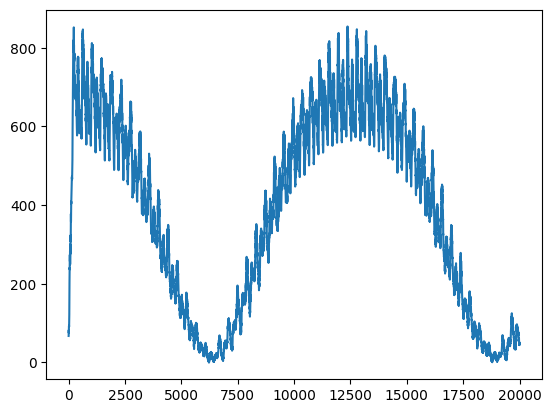

In [182]:
from scipy.signal import hilbert
from scipy.optimize import curve_fit

analytic_signal = hilbert(signal)
envelope        = np.abs(analytic_signal)
plt.plot(envelope)

### f2 = 2*f1

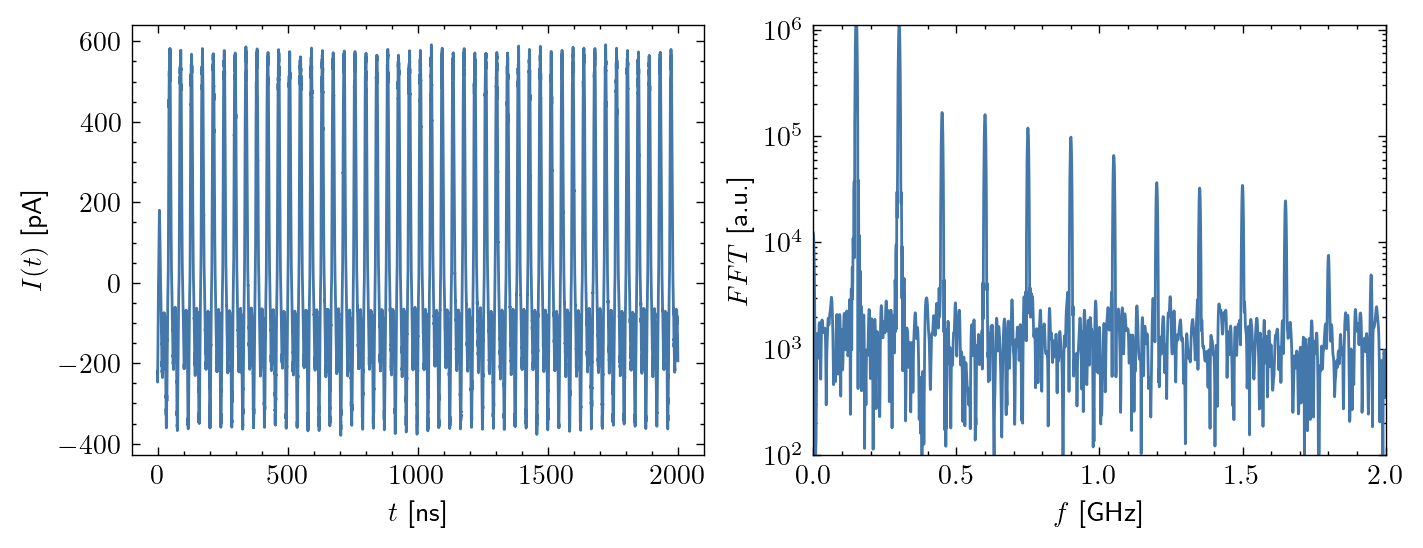

In [183]:
freq    = 1
signal  = dic[(1.5,3.0)]['Current'].values
dt      = 1e-10
xf, yf  = nanonets_utils.fft(signal-np.mean(signal), dt, n_padded=65536)
time    = np.arange(len(signal))*dt*1e9
min_y   = 100
min_x   = 0
max_x   = 2
max_y   = 1.1e6

with plt.style.context(["science", "bright"]):

    fig = plt.figure(dpi=200, layout='constrained')
    fig.set_figwidth(fig.get_figwidth()*2)

    ax = fig.add_subplot(1,2,1)
    ax.plot(time, signal)
    ax.set_ylabel("$I(t)$ [pA]")
    ax.set_xlabel("$t$ [ns]")
    # ax.set_ylim(-100,100)
    # ax.set_xlim(0,50)

    ax  = fig.add_subplot(1,2,2)
    ax.plot(xf,yf)
    # ax  = plot_freq(1.5/10, ax=ax, min_y=min_y, max_y=max_y, N_f=11)
    # ax  = plot_freq(3.0/10, ax=ax, min_y=min_y, max_y=max_y, N_f=8)
    # ax  = plot_freq_double(1.5/10, 3.0/10, ax=ax, min_y=min_y, max_y=max_y)
    ax.set_xlim(min_x, max_x)
    ax.set_ylim(min_y, max_y)
    ax.set_yscale('log')
    ax.set_xlabel("$f$ [GHz]")
    ax.set_ylabel("$FFT$ [a.u.]")

    # fig.savefig("plots/fft_output_example.png", transparent=True, bbox_inches='tight')
    # fig.savefig("plots/fft_output_example.svg", transparent=True, bbox_inches='tight')

In [184]:
f1      = 1.5
f2      = 3.0
f_vals2 = [f1, f2, 2*f1, 3*f1, 4*f2, 2*f2, 3*f2, 4*f2, f1+f2, 2*f1+f2, f1+2*f2, np.abs(f1-f2), np.abs(2*f1-f2), np.abs(f1-2*f2)]
vals2   = []

for f in f_vals2:

    vals2.append(relate_to_fundamental_freq(signal, f, dt, N_f=1)[0])

In [185]:
df1 = pd.DataFrame([f_vals1, vals1]).T
df2 = pd.DataFrame([f_vals2, vals2]).T
df1

,0,1
0,1.5,1.497519e+06
1,4.5,9.745015e+05
2,3.0,9.592809e+04
3,4.5,9.745015e+05
4,18.0,6.683741e+03
5,9.0,2.755298e+04
6,13.5,4.687021e+04
7,18.0,6.683741e+03
8,6.0,4.853202e+04
9,7.5,2.513851e+05


In [186]:
np.array(vals1)

array([1497519.40915486,  974501.50918078,   95928.08877515,
        974501.50918078,    6683.74061703,   27552.98286591,
         46870.20940725,    6683.74061703,   48532.02046657,
        251385.12135377,   22338.43669886,   95928.08877515,
       1497519.40915486,  251385.12135377])

In [187]:
f_str = ['$f_1$','$f_2$','$2 \cdot f_1$','$3 \cdot f_1$','$4 \cdot f_1$','$2 \cdot f_2$','$3 \cdot f_2$',
         '$4 \cdot f_2$', '$f_1 + f_2$', '$2 \cdot f_1 + f_2$', '$f_1 + 2 \cdot f_2$', '$|f_1 - f_2|$', '$|2 \cdot f_1 - f_2|$', '$|f_1 - 2 \cdot f_2|$']

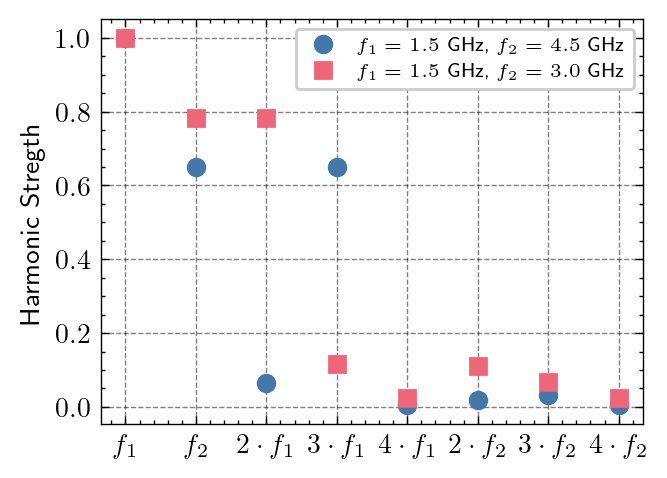

In [188]:
xmax = 8

with plt.style.context(["science","bright","grid"]):

    fig = plt.figure(dpi=200)
    ax  = fig.add_subplot()
    ax.plot(f_str[:xmax], np.array(vals1)[:xmax]/np.array(vals1)[0], 'o', label='$f_1 = 1.5$ GHz, $f_2 = 4.5$ GHz')
    ax.plot(f_str[:xmax], np.array(vals2)[:xmax]/np.array(vals2)[0], 's', label='$f_1 = 1.5$ GHz, $f_2 = 3.0$ GHz')

    ax.legend(fontsize='x-small')
    ax.set_ylabel("Harmonic Stregth")

    fig.savefig("plots/harmonic_strength.png", transparent=True, bbox_inches='tight')
    fig.savefig("plots/harmonic_strength.svg", transparent=True, bbox_inches='tight')

---